In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
# Load train/val/test
train_df = pd.read_csv("train_data.csv")
val_df   = pd.read_csv("val_data.csv")
test_df  = pd.read_csv("test_data.csv")

# Separate features and labels
X_train = train_df.iloc[:, :-6]  # all columns except last 6
y_train = train_df.iloc[:, -6:]  # last 6 columns

X_val   = val_df.iloc[:, :-6]
y_val   = val_df.iloc[:, -6:]

X_test  = test_df.iloc[:, :-6]
y_test  = test_df.iloc[:, -6:]

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (144, 30) (144, 6)
Validation shape: (31, 30) (31, 6)
Test shape: (32, 30) (32, 6)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

n_features = X_train.shape[1]  # number of input features
n_labels = y_train.shape[1]    # number of output labels

model_dense = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(n_labels, activation='sigmoid')  # multi-label output
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_dense.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_dense.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [4]:
X_train.shape  # (samples, n_features)
y_train.shape  # (samples, n_labels)


(144, 6)

In [5]:
model_dense = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(n_labels, activation='sigmoid')
])


In [6]:
model_dense.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model_dense.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/50
9/9 [==============================] - 3s 65ms/step - loss: 0.9013 - accuracy: 0.1736 - val_loss: 0.6969 - val_accuracy: 0.0645
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.7797 - accuracy: 0.2292 - val_loss: 0.6725 - val_accuracy: 0.2258
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.7129 - accuracy: 0.2847 - val_loss: 0.6515 - val_accuracy: 0.2903
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6536 - accuracy: 0.3264 - val_loss: 0.6323 - val_accuracy: 0.3226
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6073 - accuracy: 0.4583 - val_loss: 0.6165 - val_accuracy: 0.4516
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.5519 - accuracy: 0.4653 - val_loss: 0.6014 - val_accuracy: 0.4839
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.5025 - accuracy: 0.4931 - val_loss: 0.5866 - val_accuracy: 0.5161
Epoch 8/50
9/9 [=================

In [8]:
loss, accuracy = model_dense.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1/1 [==============================] - 0s 26ms/step - loss: 0.3645 - accuracy: 0.6250
Test Loss: 0.36445754766464233
Test Accuracy: 0.625


In [9]:
from sklearn.metrics import f1_score, hamming_loss, accuracy_score

y_pred_prob = model_dense.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # threshold 0.5

print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
print("Subset Accuracy:", accuracy_score(y_test, y_pred))


1/1 [==============================] - 0s 154ms/step
Hamming Loss: 0.15625
F1 Score (micro): 0.7727272727272727
Subset Accuracy: 0.4375


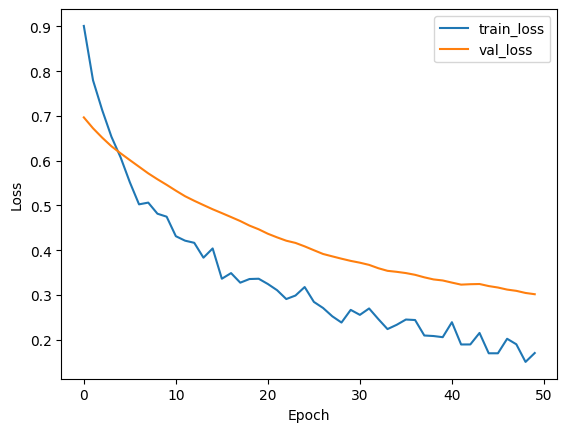

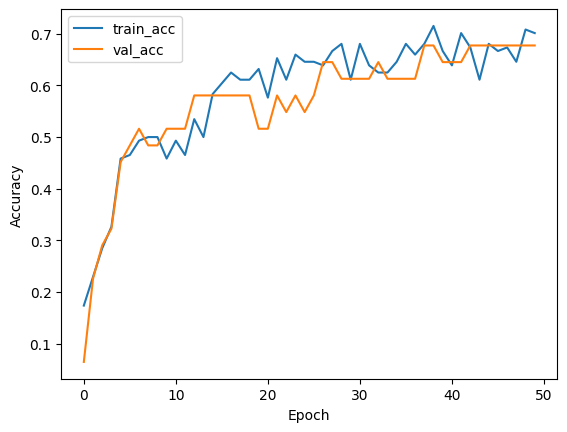

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
import numpy as np

# Hyperparameter options
layer_options = [(128, 64), (256, 128)]
dropout_options = [(0.4, 0.2), (0.3, 0.2)]
learning_rates = [0.001, 0.0005]

best_f1 = 0
best_params = None

for layers in layer_options:
    for dropouts in dropout_options:
        for lr in learning_rates:
            
            model = Sequential([
                Dense(layers[0], activation='relu', input_shape=(X_train.shape[1],)),
                BatchNormalization(),
                Dropout(dropouts[0]),
                Dense(layers[1], activation='relu'),
                BatchNormalization(),
                Dropout(dropouts[1]),
                Dense(y_train.shape[1], activation='sigmoid')
            ])
            
            model.compile(optimizer=Adam(learning_rate=lr),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
            
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=30,
                                batch_size=16,
                                verbose=0)
            
            y_pred = (model.predict(X_val) > 0.5).astype(int)
            f1 = f1_score(y_val, y_pred, average='micro')
            
            if f1 > best_f1:
                best_f1 = f1
                best_params = (layers, dropouts, lr)

print("Best F1:", best_f1)
print("Best hyperparameters:", best_params)


1/1 [==============================] - 0s 73ms/step
Best F1: 0.8627450980392157
Best hyperparameters: ((256, 128), (0.3, 0.2), 0.0005)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model_final = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)

model_final.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model_final.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
9/9 [==============================] - 2s 36ms/step - loss: 0.8919 - accuracy: 0.1597 - val_loss: 0.7055 - val_accuracy: 0.0968
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 0.7212 - accuracy: 0.2986 - val_loss: 0.6778 - val_accuracy: 0.2581
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6413 - accuracy: 0.2917 - val_loss: 0.6516 - val_accuracy: 0.2903
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5903 - accuracy: 0.3542 - val_loss: 0.6280 - val_accuracy: 0.4194
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5218 - accuracy: 0.4722 - val_loss: 0.6071 - val_accuracy: 0.4516
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.5069 - val_loss: 0.5893 - val_accuracy: 0.5161
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4596 - accuracy: 0.5000 - val_loss: 0.5729 - val_accuracy: 0.5484
Epoch 8/50
9/9 [=================

In [14]:
loss, accuracy = model_final.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Multi-label metrics
from sklearn.metrics import f1_score, hamming_loss, accuracy_score
y_pred = (model_final.predict(X_test) > 0.5).astype(int)

print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
print("Subset Accuracy:", accuracy_score(y_test, y_pred))


1/1 [==============================] - 0s 28ms/step - loss: 0.3674 - accuracy: 0.7188
Test Loss: 0.3673679232597351
Test Accuracy: 0.71875
1/1 [==============================] - 0s 92ms/step
Hamming Loss: 0.14583333333333334
F1 Score (micro): 0.7846153846153845
Subset Accuracy: 0.4375


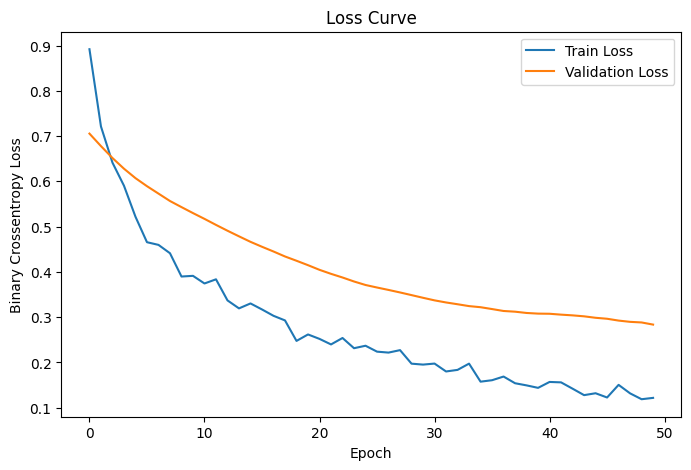

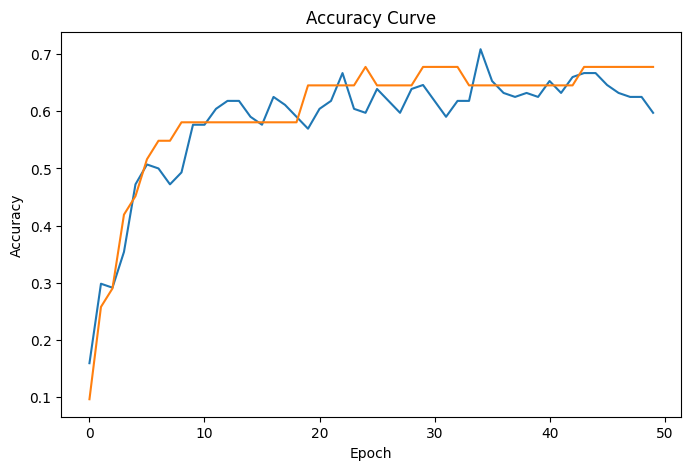

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [18]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, hamming_loss
import numpy as np

# --- 1. Make predictions ---
# Probabilities → binary using threshold 0.5
y_pred = (model_final.predict(X_test) > 0.5).astype(int)

# --- 2. Compute metrics ---
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
subset_acc = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)

# --- 3. Print results ---
print("=== Multi-Label Classification Metrics ===")
print(f"F1 Score (micro): {f1:.4f}")
print(f"Recall (micro):   {recall:.4f}")
print(f"Precision (micro):{precision:.4f}")
print(f"Subset Accuracy:  {subset_acc:.4f}")
print(f"Hamming Loss:     {hamming:.4f}")


1/1 [==============================] - 0s 54ms/step
=== Multi-Label Classification Metrics ===
F1 Score (micro): 0.7846
Recall (micro):   0.8226
Precision (micro):0.7500
Subset Accuracy:  0.4375
Hamming Loss:     0.1458
